# Data pre-processing and creation of the Mask Detector model.

This Dataset consists of 10,000 images, 5,000 face images with masks and 5,000 without masks. This Dataset is prepared by
[Ashish Jangra](https://www.kaggle.com/ashishjangra27) and available at [Kaggle](https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset)


In [1]:
#Importing the dependencies

import cv2
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import tensorflow as tf


**- Creating a path to the Directory having the full dataset, 
  and mentioning particular labels for the dataset with and without masks.**

In [2]:
DIRECTORY = r"dataset"
CATEGORIES = ["with_mask", "without_mask"]

labels=[i for i in range(len(CATEGORIES))]
label_dict=dict(zip(CATEGORIES,labels)) 

print(label_dict)
print(CATEGORIES)
print(labels)

{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


**- Pre-processing the images, this includes reading them one by one and at the same time converting them into grayscale and resizing each of them into a particular height and width.**

In [3]:
img_size = 100
data = []
target = []

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] processsing images...\n")

for category in CATEGORIES:
    folder_path = os.path.join(DIRECTORY, category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        
        # Reading the image.
        img=cv2.imread(img_path)
        
        try:
            #Coverting the image into gray scale
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)      
            
            #resizing the gray scale into 100 x 100, since we need a common size for all the images in the Dataset. 
            resized=cv2.resize(gray,(img_size,img_size)) 
            
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image     


[INFO] processsing images...



### - Normalising the data.

In [4]:
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

print(data.shape[1:])
print(new_target.shape)

(100, 100, 1)
(10000, 2)


### - Defining the CNN model and its various layers.**

In [13]:
Epoch = 20
Batch_size = 40

model=Sequential()

model.add(Conv2D(100, (5,5), input_shape = data.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#The first CNN layer followed by MaxPooling layers

model.add(Conv2D(50,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()      # Gives a summary of the result of model fitting function.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 96, 96, 100)       2600      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 100)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 50)        45050     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 50)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 11250)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11250)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)               

In [15]:
# Assigning the data for Training and Testing
train_data, test_data, train_target, test_target = train_test_split(data, new_target, test_size = 0.1)


In [16]:
# Training the model.
history = model.fit(train_data, 
                    train_target,
                    Batch_size,
                    Epoch, 
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/20
180/180 [==============================] - 86s 479ms/step - loss: 0.4261 - accuracy: 0.7731 - val_loss: 0.1125 - val_accuracy: 0.9611
Epoch 2/20
180/180 [==============================] - 84s 468ms/step - loss: 0.1403 - accuracy: 0.9521 - val_loss: 0.0955 - val_accuracy: 0.9711
Epoch 3/20
180/180 [==============================] - 84s 465ms/step - loss: 0.1175 - accuracy: 0.9618 - val_loss: 0.0895 - val_accuracy: 0.9700
Epoch 4/20
180/180 [==============================] - 85s 474ms/step - loss: 0.0978 - accuracy: 0.9679 - val_loss: 0.1028 - val_accuracy: 0.9644
Epoch 5/20
180/180 [==============================] - 88s 490ms/step - loss: 0.0853 - accuracy: 0.9715 - val_loss: 0.0895 - val_accuracy: 0.9639
Epoch 6/20
180/180 [==============================] - 84s 467ms/step - loss: 0.0737 - accuracy: 0.9735 - val_loss: 0.0685 - val_accuracy: 0.9778
Epoch 7/20
180/180 [==============================] - 89s 494ms/step - loss: 0.0703 - accuracy: 0.9756 - val_loss: 0.0606 - val_ac

### - Plotting the accuracy and loss of the data.

[0.42609095573425293, 0.14031340181827545, 0.11752079427242279, 0.09784385561943054, 0.08532113581895828, 0.07368241995573044, 0.0703236311674118, 0.07324761152267456, 0.0647844448685646, 0.05259193480014801, 0.04540631175041199, 0.03997248038649559, 0.041464172303676605, 0.04208885505795479, 0.03665280342102051, 0.0355423204600811, 0.03804454207420349, 0.03863194212317467, 0.033438313752412796, 0.025654101744294167]
Train loss =  0.025654101744294167
Train accuracy =  0.9897222518920898
Test loss =  0.04994923993945122
Test accuracy =  0.9872221946716309


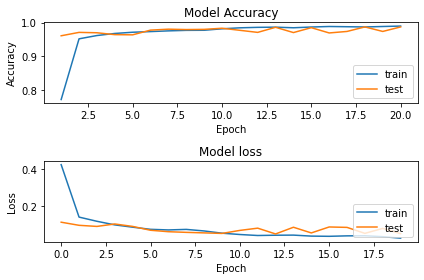

In [17]:
print(history.history['loss'])
print("Train loss = ", history.history['loss'][-1])
print("Train accuracy = ", history.history['accuracy'][-1])
          
print("Test loss = ", history.history['val_loss'][-1])
print("Test accuracy = ", history.history['val_accuracy'][-1])
    
    
plt.subplot(2,1,1)
plt.title('Model Accuracy')
plt.plot(range(1, Epoch+1), history.history['accuracy'])
plt.plot(range(1,  Epoch+1), history.history['val_accuracy'])
    
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
    
plt.subplot(2,1,2)
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
    
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
    
    
plt.tight_layout()


In [18]:
# Saving the Model.
print("[INFO] saving mask detector model...")
model.save("mask_detector2.model", save_format="h5")

[INFO] saving mask detector model...
